In [1]:
from datareader import DLEMDataset
from util import convert_diags_to_full_contact
import util
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
from models.encodetocontact_1d_out import DLEM

In [3]:
import torch

In [4]:
BATCH_SIZE = 4 

In [5]:
data = DLEMDataset(".data/dlem_training")

In [6]:
model = DLEM(data.patch_dim, data.feature_dim, data.start_diag, data.stop_diag)

In [7]:
index_diagonal = util.diag_index_for_mat(120, data.start_diag, data.stop_diag)

In [8]:
mat = convert_diags_to_full_contact(data[0][0], data.start_diag, data.stop_diag)

In [9]:
arr = []
for i in range(data.start_diag, data.stop_diag):
    arr.append(np.all(data[0][0][index_diagonal(5)] == np.diag(mat,5)))

In [10]:
np.all(arr)

True

In [11]:
data[0][0].shape, data[0][1].shape

((6083,), (4, 120))

In [12]:
test_fold = 'fold4'
val_fold = 'fold5'

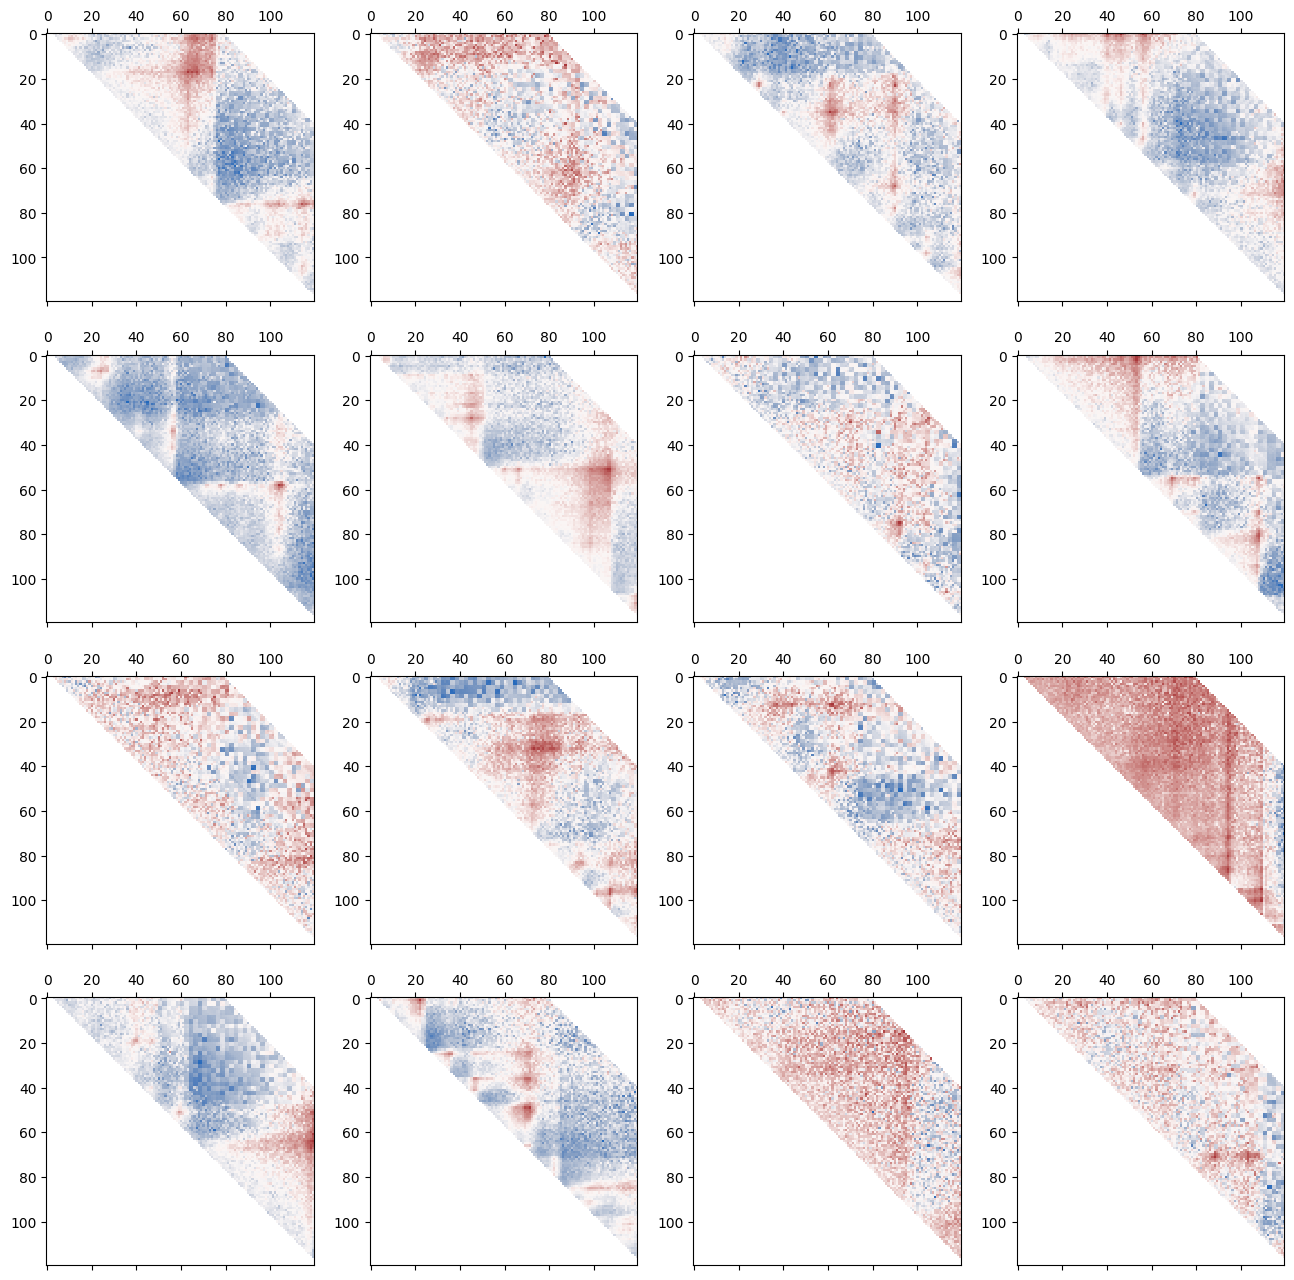

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    ax.matshow(convert_diags_to_full_contact(data[-i][0], data.start_diag, data.stop_diag), cmap="vlag") 

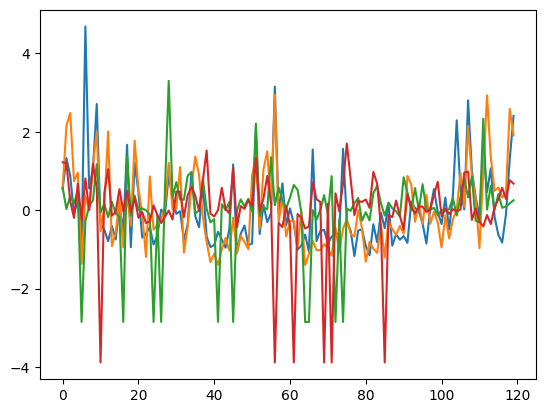

In [14]:
plt.plot(data[-5][1].T)

In [15]:
data.data_folds

array(['fold0', 'fold0', 'fold0', ..., 'fold7', 'fold7', 'fold7'],
      dtype=object)

In [16]:
data_test = torch.utils.data.Subset(data, np.where(data.data_folds == test_fold)[0])
data_val = torch.utils.data.Subset(data, np.where(data.data_folds == val_fold)[0])
data_train = torch.utils.data.Subset(data, np.where(np.logical_and(data.data_folds != val_fold,
                                                                   data.data_folds != test_fold))[0])

In [17]:
dataloader_test = torch.utils.data.DataLoader(data_test, batch_size = BATCH_SIZE, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(data_val, batch_size = BATCH_SIZE, shuffle=True)
dataloader_train = torch.utils.data.DataLoader(data_train, batch_size = BATCH_SIZE, shuffle=True)

In [18]:
batch = next(iter(dataloader_test))

In [19]:
batch[0][:, index_diagonal(5)].shape

torch.Size([4, 115])

In [20]:
batch[1].shape

torch.Size([4, 4, 120])

In [21]:
batch[0].shape

torch.Size([4, 6083])

In [22]:
batch[1].transpose(-2,-1).shape

torch.Size([4, 120, 4])

In [23]:
batch[1].dtype

torch.float32

In [32]:
len(index_diagonal(6))

114

In [31]:
model(batch[1].transpose(-2,-1), torch.exp(batch[0][:, index_diagonal(5)]), 5).shape

torch.Size([4, 114])

In [24]:
out = model.contact_map_prediction(batch[1].transpose(-2,-1),
                             torch.from_numpy(np.ones((batch[1].shape[0], data.patch_dim), dtype=np.float32) * data.patch_dim))

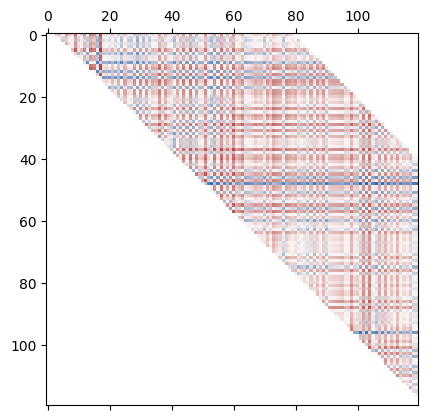

In [27]:
plt.matshow(convert_diags_to_full_contact(out[0], data.start_diag, data.stop_diag), cmap="vlag") 

In [26]:
batch[0]

tensor([[ 0.0711, -0.0333, -0.1054,  ...,  0.2793, -0.3757,  0.4471],
        [ 0.6570, -0.3798, -0.4378,  ...,  0.2614,  0.6165,  0.5937],
        [ 0.0733, -0.0674, -0.1419,  ..., -0.1018,  0.1039, -0.3245],
        [-0.4535, -0.4260, -0.2515,  ...,  0.2575,  0.4326,  0.0436]])